In [17]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

import time

from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
#path dataset
path = "../DataSet/"
df = pd.read_csv(path + 'Dataset_Final.csv') 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotValid,TotalSatisfaction,ProbablyLeave
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,20,2.0,2,8.0,7,2,13,False,11,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.0,3,1.0,8,1,6,True,11,1
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,7,4.0,3,1.0,5,1,2,False,13,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.0,3,3.0,7,0,7,False,9,1
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,3.0,3,10.0,2,2,1,True,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,2,3.0,3,8.0,2,2,2,True,12,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,6,5.0,3,4.0,2,1,2,False,9,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,9,3.0,2,1.0,4,1,4,False,15,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,4,3.0,2,8.0,2,1,3,True,9,1


In [3]:
features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [4]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[features])

In [12]:
link_methods = ["average", "complete", "ward", "single"]

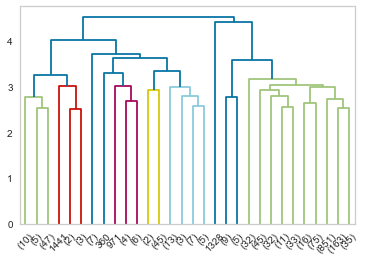

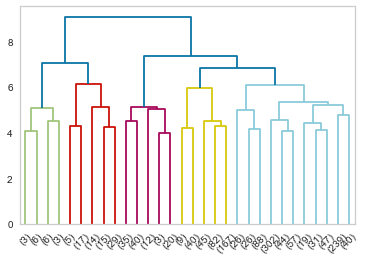

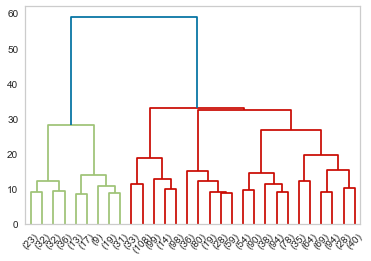

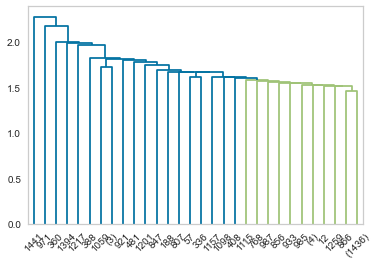

In [27]:
# Plot dendogrammi per ogni metodo
for i in link_methods:
    data_dist = pdist(scaled_features, metric='euclidean')
    data_link = linkage(data_dist, method=i, metric='euclidean')
    # visualizzo il dendrogramma
    res = dendrogram(data_link, truncate_mode='lastp')
    plt.grid()
    plt.show()

In [81]:
link_methods = [("average", 4), ("average", 7), ("complete",5), ("ward",6), ("single", 5)]

In [45]:
# Creazione grafico di connettività locale.
# Più vicini => cluster più omogenei
# Più vicini => dimensione dei cluster distribuite in modo più uniforme
knn_graph = kneighbors_graph(scaled_features, 20, include_self=False)

In [82]:
df_copy = df.copy()

 Method average Connectivity False
- Silhouette: 0.3026012185252551
Cluster #0 = 94
Cluster #1 = 1307
Cluster #2 = 1
Cluster #3 = 68


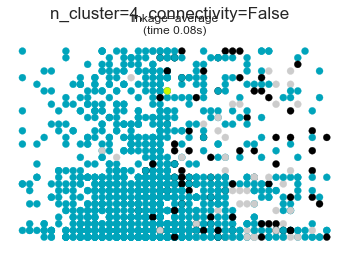

 Method average Connectivity True
- Silhouette: 0.39999945449881463
Cluster #0 = 1457
Cluster #1 = 10
Cluster #2 = 2
Cluster #3 = 1


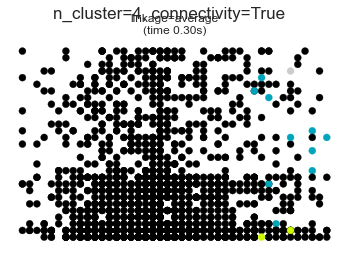

 Method average Connectivity False
- Silhouette: 0.19064614458812776
Cluster #0 = 75
Cluster #1 = 68
Cluster #2 = 12
Cluster #3 = 1293
Cluster #4 = 7
Cluster #5 = 1
Cluster #6 = 14


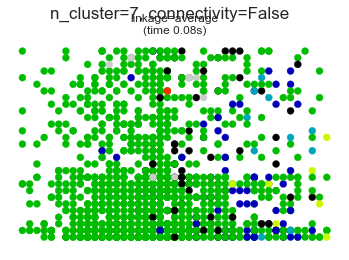

 Method average Connectivity True
- Silhouette: 0.33045229407483817
Cluster #0 = 5
Cluster #1 = 1452
Cluster #2 = 2
Cluster #3 = 1
Cluster #4 = 2
Cluster #5 = 3
Cluster #6 = 5


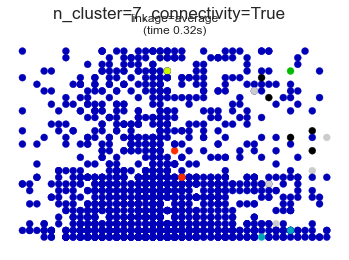

 Method complete Connectivity False
- Silhouette: 0.11566254271040062
Cluster #0 = 80
Cluster #1 = 919
Cluster #2 = 110
Cluster #3 = 18
Cluster #4 = 343


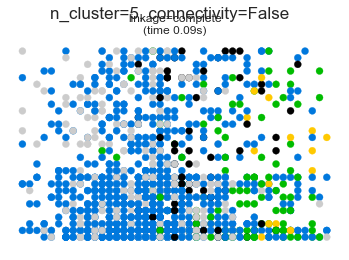

 Method complete Connectivity True
- Silhouette: 0.3973042350918971
Cluster #0 = 1450
Cluster #1 = 12
Cluster #2 = 1
Cluster #3 = 3
Cluster #4 = 4


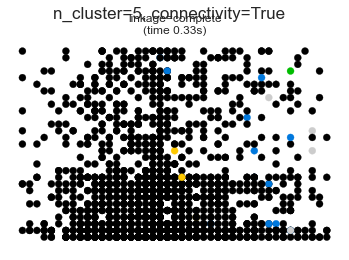

 Method ward Connectivity False
- Silhouette: 0.13077410724649985
Cluster #0 = 330
Cluster #1 = 222
Cluster #2 = 352
Cluster #3 = 89
Cluster #4 = 123
Cluster #5 = 354


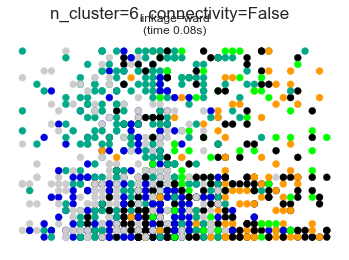

 Method ward Connectivity True
- Silhouette: 0.13077410724649985
Cluster #0 = 330
Cluster #1 = 222
Cluster #2 = 352
Cluster #3 = 89
Cluster #4 = 123
Cluster #5 = 354


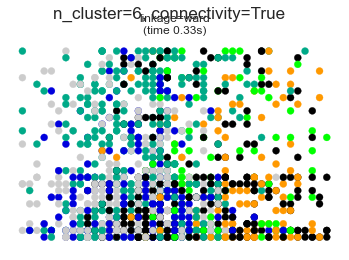

 Method single Connectivity False
- Silhouette: 0.3124695017824083
Cluster #0 = 1466
Cluster #1 = 1
Cluster #2 = 1
Cluster #3 = 1
Cluster #4 = 1


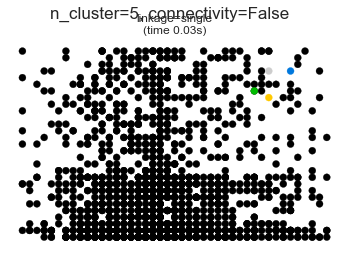

 Method single Connectivity True
- Silhouette: 0.3124695017824083
Cluster #0 = 1466
Cluster #1 = 1
Cluster #2 = 1
Cluster #3 = 1
Cluster #4 = 1


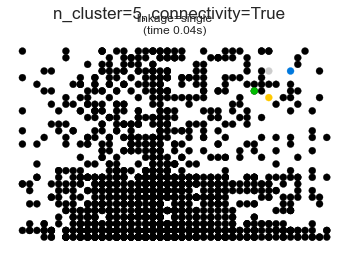

In [83]:
for i in link_methods:
    for connectivity in (None, knn_graph):
        model = AgglomerativeClustering(linkage=i[0],
                                        connectivity=connectivity,
                                        n_clusters=i[1])
        t0 = time.time()
        model.fit(scaled_features)
        elapsed_time = time.time() - t0
        sil = silhouette_score(scaled_features, model.labels_, metric = "euclidean")
        print(" Method " + str(i[0]) + " Connectivity " + str(connectivity is not None))
        print("- Silhouette: " + str(sil))
        for cluster in range(0, i[1]):
            print("Cluster #"+ str(cluster) + " = " + str(list(model.labels_).count(cluster)))
        name_newF = str(i[0])+str(i[1])+str(1 if connectivity is not None else 0)
        df_copy[name_newF] = model.labels_
        plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=model.labels_,
                    cmap=plt.cm.nipy_spectral)
        plt.title('linkage=%s\n(time %.2fs)' % (i[0], elapsed_time),
                  fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')
        plt.suptitle('n_cluster=%i, connectivity=%r' %
                     (i[1], connectivity is not None), size=17)
        plt.show()

In [84]:
df_copy

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,average40,average41,average70,average71,complete50,complete51,ward60,ward61,single50,single51
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,1,0,3,1,1,0,0,0,0,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,1,0,3,1,1,0,1,1,0,0
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,1,0,3,1,1,0,5,5,0,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,1,0,3,1,4,0,2,2,0,0
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,1,0,3,1,1,0,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,1,0,3,1,1,0,0,0,0,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,1,0,3,1,4,0,2,2,0,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,1,0,3,1,1,0,5,5,0,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,1,0,3,1,4,0,2,2,0,0


In [92]:
features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [94]:
x = df[features].copy()

x["clusters"] = df_copy["ward60"]

In [95]:
fig = go.Figure(data=
                go.Parcoords(
                    dimensions = list([
                        dict(
                            label = "Age", values = x["Age"]),
                        dict(
                            label = 'DistanceFromHome', values = x['DistanceFromHome']),
                        dict(
                            label = 'MonthlyIncome', values = x["MonthlyIncome"]),
                        dict(
                            label = 'TotalWorkingYears', values = x["TotalWorkingYears"]),
                        dict(
                            label = 'YearsAtCompany', values = x["YearsAtCompany"]),
                        dict(
                            label = 'TotalSatisfaction', values = x["TotalSatisfaction"]),
                        dict(
                            label = 'Clusters', values = x["clusters"])
                    ])
                )
        )
fig.show()

In [96]:
x["ChildWorking"] = [1 if ( ( (c[0] - c[3]) < 18) & ((c[0] - c[3]) > 0)) else 0 for c in x.values]

In [97]:
x["PreviusBirthWorking"] = [1 if ( (c[0] - c[3]) <= 0 ) else 0 for c in x.values]

In [98]:
x["IllegalWorking"] = [1 if ((c[4] > c[3]) & (c[7]==0))  else 0 for c in x.values]

In [99]:
fig = go.Figure(data=
                go.Parcoords(
                    dimensions = list([
                        dict(
                            label = "IllegalWorking", values = x["IllegalWorking"]),
                        dict(
                            label = 'ChildWorking', values = x['ChildWorking']),
                        dict(
                            label = 'PreviusBirthWorking', values = x["PreviusBirthWorking"]),
                        dict(
                            label = 'Clusters', values = x["clusters"])
                    ])
                )
        )
fig.show()